> I have performed this exercise on google colab so the following two blocks load the dataset, delete them and uncomment the other block if you want to test it on local machine

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pickle

with open("/content/gdrive/My Drive/task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)
data_multiomics.head(5)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [ ]:
# Calculate the number of males and females
num_males = (data_multiomics['Sex'] == 'Male').sum()
num_females = (data_multiomics['Sex'] == 'Female').sum()
num_males, num_females

(32, 36)

# Multiomics modeling

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`task1_multiomics_ghaemi2019multiomics.pdf`).
The idea is to use different modalities (measurements collected from the immune system, microbiome, etc.) to characterize biological changes during pregnancy. 
This includes whether we can predict the gestational age of a mother solely based on the collected biomarkers.

**Note**: There is no need to get accquainted with multiomics modeling, at least for this exercise. In the end, this is just a regular data science task :) 

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details pleaase see the paper.

In [ ]:
# # code for loading the data

# import numpy as np
# import pickle

# with open("task1_multiomics_data.pickle", "rb") as file:
#     data_multiomics = pickle.load(file)
    
# data_multiomics.head(5)

In [ ]:
# look at the immune system
data_multiomics["immune_system"].head(5)

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


## Task 1: Your experience

Before we start, please briefly describe your experience in data science and machine learning (5 sentences).

> I got my formal introduction to machine learning during my masters program and later I enriched it with different MOOCs. One specific specialization course that helped me a lot with theory as well as intense practical skills is "Applied Data Science with Python", a 5-course specialization by University of Michigan which covered so much ground from machine learning models to natural language processing, visualizations and much more. I have produced a conference paper title "Movie Genre Classification from Movie Posters Using Deep Feedforward Network", where I have applied deep learning neural networks to classify the genre of a movie from its poster image.

## Task 2: Reproduce Figure 1

1. Reproduce **Figure 1 B and C** from the paper.
2. Explain in a few words why this analyhsis was conducted, and what the authors want to tell the reader with the results.

**Figure 1:**<br/>
<img src="assets/task1_multiomics_fig1.jpeg">

In [ ]:
measurements_per_entity = data_multiomics.groupby(level=0, axis=1).size()

In [ ]:
columns = ['cellfree_rna', 'immune_system', 'metabolomics', 'microbiome', 'plasma_luminex', 'plasma_somalogic', 'serum_luminex']
measurements_per_entity[columns]

cellfree_rna        37275
immune_system         534
metabolomics         3485
microbiome          18548
plasma_luminex         62
plasma_somalogic     1300
serum_luminex          62
dtype: int64

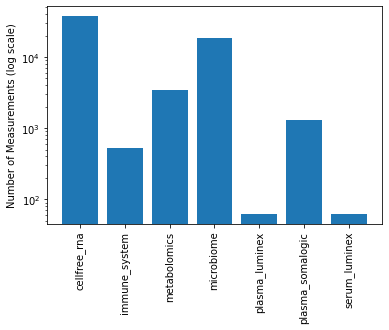

In [ ]:
import matplotlib.pyplot as plt

plt.bar(columns, measurements_per_entity[columns].values)
plt.yscale('log', base=10)
plt.xticks(rotation=90)
plt.ylabel('Number of Measurements (log scale)')
plt.show()

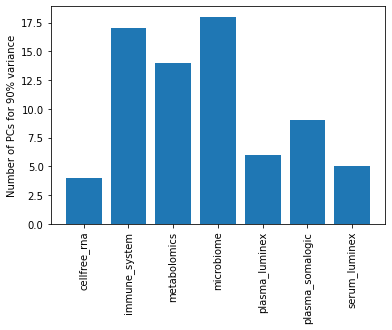

In [ ]:
from sklearn.decomposition import PCA

n_pcs = {}
for column in columns:
    pca = PCA(n_components=0.9)
    pca.fit(data_multiomics[column])
    n_pcs[column] = pca.n_components_
#     print("{} = {}".format(column, pca.n_components_))

import matplotlib.pyplot as plt

plt.bar(n_pcs.keys(), n_pcs.values())
plt.xticks(rotation=90)
plt.ylabel('Number of PCs for 90% variance')
plt.show()

> The first graph was drawn to see the number of measurements in the seven entities i.e cellfree_rna, immune_system etc

> The second graph was drawn to describe the variance in each entity. So greather the number of PCs in an entity the greater will be variance.

## Task 3: Build a prediction model for `gestational_age`

1. Pick **two modalities** and train two models to predict `gestational_age` **for each of them** (the original paper built models for all seven of them and combined them as well; you don't need to do that).
This should result in four trained models.
For example, one trained model could based on `linear regression` as a model, the `immune_system` data as input, and `gestational_age` as output.

2. **Evaluate** your models using a measure that you think fits best and **visualize** your predictions similar to **Figure 5**.

3. For your best model, **plot a figure** similar to **Figure 2D**.

4. **Briefly explain** your choices and discuss the results (particularly if your approach or your results differ from the paper).

To train and evaluate models, you can use [scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).

**Figure 5:**<br/>
<img src="assets/task1_multiomics_fig5_min.jpeg">

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
training_data, testing_data = train_test_split(data_multiomics, test_size=0.2, random_state=40)

In [ ]:
num_males = (training_data['Sex'] == 'Male').sum()
num_females = (training_data['Sex'] == 'Female').sum()
num_males, num_females

(24, 30)

In [ ]:
num_males = (testing_data['Sex'] == 'Male').sum()
num_females = (testing_data['Sex'] == 'Female').sum()
num_males, num_females

(8, 6)

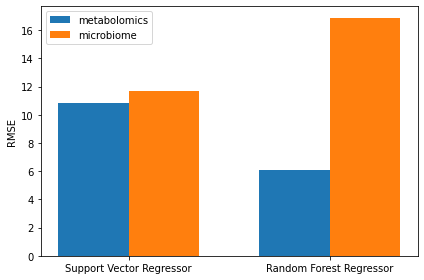

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# cellfree_rna        37275
# immune_system         534
# metabolomics         3485
# microbiome          18548
# plasma_luminex         62
# plasma_somalogic     1300
# serum_luminex          62

f1 = 'metabolomics'
f2 = 'microbiome'

X_train_f1 = training_data[f1]
X_test_f1 = testing_data[f1]
y_train = training_data['gestational_age']
 
X_train_f2 = training_data[f2]
X_test_f2 = testing_data[f2]
y_test = testing_data['gestational_age']


# Train a linear regression model on feature 1
# model1_f1 = LinearRegression()
model1_f1 = SVR()
model1_f1.fit(X_train_f1, y_train)

# Train a linear regression model on feature 2
model1_f2 = SVR()
model1_f2.fit(X_train_f2, y_train)

# Train a random forest model on feature 1
model2_f1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2_f1.fit(X_train_f1, y_train)

# Train a random forest model on feature 2
model2_f2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2_f2.fit(X_train_f2, y_train)

# Test the linear regression models on the test sets for feature 1 and feature 2
y_pred_model1_f1 = model1_f1.predict(X_test_f1)
y_pred_model1_f2 = model1_f2.predict(X_test_f2)

# Test the random forest models on the test sets for feature 1 and feature 2
y_pred_model2_f1 = model2_f1.predict(X_test_f1)
y_pred_model2_f2 = model2_f2.predict(X_test_f2)

# Calculate the RMSE scores for each model and feature
rmse_model1_f1 = np.sqrt(mean_squared_error(y_test, y_pred_model1_f1))
rmse_model1_f2 = np.sqrt(mean_squared_error(y_test, y_pred_model1_f2))
rmse_model2_f1 = np.sqrt(mean_squared_error(y_test, y_pred_model2_f1))
rmse_model2_f2 = np.sqrt(mean_squared_error(y_test, y_pred_model2_f2))

# Create a bar chart of the RMSE scores for each model and feature
models = ['Support Vector Regressor', 'Random Forest Regressor']
features = [ f1, f2]
rmse_scores = [[rmse_model1_f1, rmse_model2_f1], [rmse_model1_f2, rmse_model2_f2]]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rmse_scores[0], width, label=features[0])
rects2 = ax.bar(x + width/2, rmse_scores[1], width, label=features[1])

ax.set_ylabel('RMSE')
ax.set_xticks(x)
# ax.set_yscale('log')
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


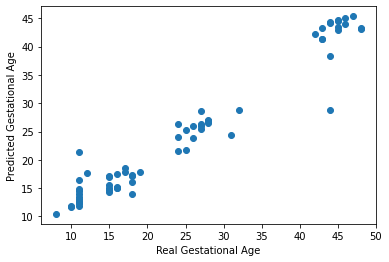

In [ ]:
fig, ax = plt.subplots()
ax.plot(data_multiomics['gestational_age'], model2_f1.predict(data_multiomics['metabolomics']), 'o')

# Add labels and title
ax.set_xlabel('Real Gestational Age')
ax.set_ylabel('Predicted Gestational Age')

# Show the plot
plt.show()

> I selected metabolomics and microbiome as features

> The models are support vector regressor and Random Forest Regressor, I also tried LinearRegressor but it performed badly

> In this case, Random Forest Regressor performs comparativevly better as seen from the graph

> I used RMSE as we are dealing with age prediction which is a continueous value

> I have also plotted the real gestational age against the predicted one by the best model ie Random Forest Regressor with metabolomics as features. 

**Figure 2D:**<br/>
<img src="assets/task1_multiomics_fig2d.jpeg">

## Task 4: Predicting the sex of the baby using neural networks

1. Try using a neural network in Tensorflow or PyTorch for the previous predicion task. 
2. Perform hypterparameter optimization.
3. Discuss your choices in designing and optimizing the neural network.
4. Discuss why a neural network may be better/worse than applying a regular model (e.g., linear regression or a random forest).

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import feature_column
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

In [ ]:
X = data_multiomics[columns]

In [ ]:
data_multiomics['Sex'] = data_multiomics['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
y = data_multiomics['Sex']

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

# make predictions on test set
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Epoch 1/15
2/2 [==============================] - 1s 270ms/step - loss: 613.6581 - accuracy: 0.4651 - val_loss: 850.9455 - val_accuracy: 0.3636
Epoch 2/15
2/2 [==============================] - 0s 43ms/step - loss: 621.2030 - accuracy: 0.4651 - val_loss: 473.4806 - val_accuracy: 0.6364
Epoch 3/15
2/2 [==============================] - 0s 45ms/step - loss: 605.8068 - accuracy: 0.5349 - val_loss: 328.5158 - val_accuracy: 0.5455
Epoch 4/15
2/2 [==============================] - 0s 46ms/step - loss: 273.7497 - accuracy: 0.5349 - val_loss: 700.8751 - val_accuracy: 0.3636
Epoch 5/15
2/2 [==============================] - 0s 57ms/step - loss: 532.1561 - accuracy: 0.4651 - val_loss: 249.3768 - val_accuracy: 0.3636
Epoch 6/15
2/2 [==============================] - 0s 44ms/step - loss: 176.7024 - accuracy: 0.5581 - val_loss: 258.9671 - val_accuracy: 0.6364
Epoch 7/15
2/2 [==============================] - 0s 43ms/step - loss: 253.5841 - accuracy: 0.6279 - val_loss: 212.9265 - val_accuracy: 0.636

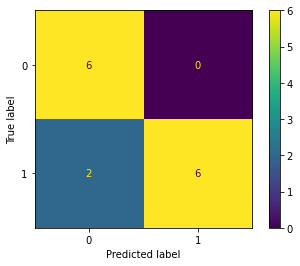

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.963, Test: 0.857


> I have trained a basic neural network to predict the sex based on the rest of the columns

> as you can see from the confusion metrics, the model is performing terribly

> the reason is that data is very much limited and so neural network will overfit the data, as you can see training accuracy is around 90% but the test accuracy is very low 63%

> if we increase the epochs the training accuracy will be increased and model will overfit the data but the testing accuracy will suffer

## Task 5: Feedback

Were the tasks above difficult, easy, or a mixture? In both cases, briefly describe why.

> both were fairly easy not much difficult

> but if we strive to get the maximum accuracy then it will take some struggle and experimentation to get there